Pearson correlation coefficient: 0.97
R-squared: 0.939
Mean Absolute Error: 0.473


/home/harry/miniconda3/envs/biogas/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/harry/miniconda3/envs/biogas/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


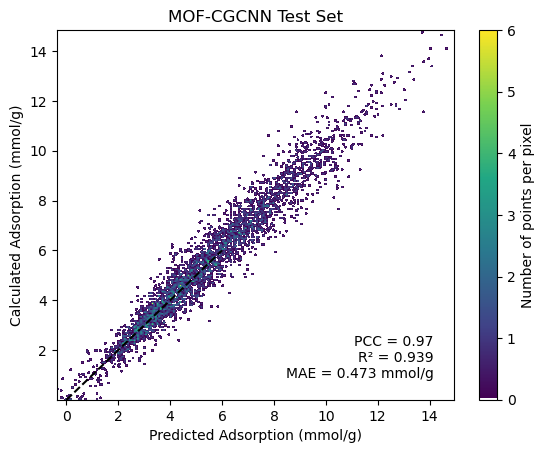

In [2]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import mpl_scatter_density

test_results = pd.read_csv('test_results.csv')

target_values = test_results.iloc[:, 1]
predictions = test_results.iloc[:, 2]

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(target_values, predictions)
correlation_coefficient = round(correlation_coefficient, 3)

# Calculate R-squared
r2 = r2_score(target_values, predictions)
r2 = round(r2, 3)

# Calculate MAE
mae = mean_absolute_error(target_values, predictions)
mae = round(mae, 3)

print("Pearson correlation coefficient:", correlation_coefficient)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, predictions, target_values)
plt.plot([0, 6], [0, 6], color='black', linestyle='--')
# plt.xlim(0, 14)
# plt.ylim(0, 14)
plt.xlabel('Predicted Adsorption (mmol/g)')
plt.ylabel('Calculated Adsorption (mmol/g)')
plt.title('MOF-CGCNN Test Set')
text = 'PCC = {}\nR² = {}\nMAE = {} mmol/g'.format(correlation_coefficient, r2, mae)
plt.text(0.95, 0.05, text, ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()